- K neighbors는 거리 공간 상에 있는 훈련 인스턴스
- K is hyperparameter
- Classification: voting, Regression: Average

### KNN is 게으른 학습 알고리즘(Lazy learner) and Instance based learner
- not calculating parameter(non-parametic model)
- lazy learner의 단점은 예측을 할 때 계산이 많이 필요하다. eager learner(like linear regression)은 미리 parameter를 계산해두었기 때문에 예측 시에 비용이 많이 소모된다.
- non parametic 모델은 훈련 데이터가 많고 설명 변수와 반응 변수 사이의 관계에 대해 알려진 게 없을 때 유용하다. 데이터가 얼마 없고 관계에 대한 정보가 있을 시에는 parametic model이 더 좋다.

### KNN의 유일한 가정은 서로 가까운 인스턴스는 유사한 반응 변수 값을 가진다는 것이다.

# 1. Classification

### 1. Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

### 2. EDA

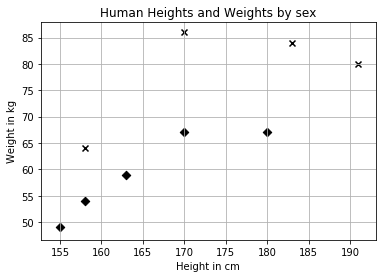

In [2]:
plt.figure()
plt.title("Human Heights and Weights by sex")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
    plt.grid(True)

### 3. Model

In [3]:
x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
print(distances)

[ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]


In [4]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
print(nearest_neighbor_genders)

['male' 'female' 'female']


In [5]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
print(b.most_common(1)[0][0])

female


In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [7]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
print(y_train_binarized)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [9]:
K = 3

In [11]:
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarzed = clf.predict(np.array([155, 70]).reshape(1,-1))[0]
predicted_label = lb.inverse_transform(prediction_binarzed)
predicted_label

array(['female'], dtype='<U6')

In [18]:
X_test = np.array([[168, 65],
                  [180, 96],
                  [160, 52],
                  [169, 67]])

y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print("Binarized labels: %s"% y_test_binarized.T[0])

Binarized labels: [1 1 0 0]


In [19]:
prediction_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % prediction_binarized)
print('Predicted labels: %s' % lb.inverse_transform(prediction_binarized))

Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


### 4. Evaluation

- Accuracy

In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, prediction_binarized))

Accuracy 0.75


- Precision: 긍정 예측 중에 실제 긍정인 비율

In [21]:
from sklearn.metrics import precision_score
print('Preicision: %s' % precision_score(y_test_binarized, prediction_binarized))

Preicision: 1.0


- recall: 실제 긍정인 것 중에 긍정 예측한 것

In [23]:
from sklearn.metrics import recall_score
print('Recall: %s' %recall_score(y_test_binarized, prediction_binarized))

Recall: 0.5


- f1_score: 정밀도와 재현율의 조화 평균(2 / (1/recall) + (1/precision))

In [24]:
from sklearn.metrics import f1_score
print("F1 score: %s" % f1_score(y_test_binarized, prediction_binarized))

F1 score: 0.6666666666666666


- Matthew correlation coefficient

In [25]:
from sklearn.metrics import matthews_corrcoef
print("Matthew correlation coefficient: %s" %
      matthews_corrcoef(y_test_binarized, prediction_binarized))

Matthew correlation coefficient: 0.5773502691896258


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, prediction_binarized, 
                            target_names=['male'], labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



# 2. Classification

In [27]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

- 회귀에서의 평가: MAE, MSE, R2 SCORE

### 1. Data

In [32]:
X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [178, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

In [33]:
X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]

### 2. Hyperparameter set

In [34]:
K = 3

### 3. Model

In [35]:
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [38]:
print("PRedicted wieghts: %s" % predictions)
print("R2 Score: %s" %r2_score(y_test, predictions))
print("MAE: %s " %mean_absolute_error(y_test, predictions))
print("Mean squared error: %s" % mean_squared_error(y_test, predictions))

PRedicted wieghts: [59 67 54 59]
R2 Score: 0.08607350096711797
MAE: 11.25 
Mean squared error: 236.25


# 3. Feature normalization

In [39]:
from scipy.spatial.distance import euclidean

In [40]:
# 키(milimeter)
X_train = np.array([
    [1700, 1],
    [1600, 0]
])
x_test = np.array([1640, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

60.0
40.01249804748511


- 밀리미터로 표현하면 키 차이가 더 크게 나타난다.

In [44]:
# 키(meter)
X_train = np.array([
    [1.7, 1],
    [1.6, 0]
])
x_test = np.array([1.64, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

0.06000000000000005
1.0007996802557442


- 미터로 표현하면 성 차이가 더 멀다.

### Scaler

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [178, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

In [71]:
X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]

In [81]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [82]:
X_train_scaled = ss.fit_transform(X_train)

/Users/sailyourlife/anaconda3/envs/scikit-learn/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [83]:
print(X_train)
print(X_train_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [178   0]]
[[-1.04119359  1.11803399]
 [-0.05479966  1.11803399]
 [ 1.01379376  1.11803399]
 [ 1.6713897   1.11803399]
 [-1.28779207 -0.89442719]
 [-0.63019612 -0.89442719]
 [ 0.76719527 -0.89442719]
 [-1.04119359 -0.89442719]
 [ 0.60279629 -0.89442719]]


In [84]:
X_test_scaled = ss.transform(X_test)

/Users/sailyourlife/anaconda3/envs/scikit-learn/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [85]:
print(X_test_scaled)

[[-0.21919865  1.11803399]
 [ 0.76719527  1.11803399]
 [-0.8767946  -0.89442719]
 [-0.13699916 -0.89442719]]


In [86]:
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)

In [87]:
print("PRedicted wieghts: %s" % predictions)
print("R2 Score: %s" %r2_score(y_test, predictions))
print("MAE: %s " %mean_absolute_error(y_test, predictions))
print("Mean squared error: %s" % mean_squared_error(y_test, predictions))

PRedicted wieghts: [64 80 49 54]
R2 Score: 0.5793036750483559
MAE: 8.25 
Mean squared error: 108.75


- 데이터를 표준화 하고 나서 모델이 더 좋은 성능을 나타냈다. 데이터 표준화를 통해서 개인의 성별을 나타내는 특징이 인스턴스 거리에 더 많은 영향을 준 것이다.
-> 더 나은 예측이 가능해진다.